In [1]:
import matutils as u

import os, numpy as np
from plancklens import utils, n0s
import plancklens

#if __name__ == '__main__':
# gets N0 and plot them
import pylab as pl

In [2]:
thloc = '/global/homes/o/omard/fgestimates/'

mlmax = 6000

allelementstosave = np.load('../../fgestimates/input_cmb_145.npy')
ells, lcmb, tsz, ksz, radio, cib, dust, nl145, totalcmb, totalnoisecmb = allelementstosave.T
ell = np.arange(mlmax+1)
fgs = tsz+ksz+radio+cib+dust
noise = np.interp(ell, ells, nl145+fgs)
Nl_tt = np.nan_to_num(noise)
nells = {"TT": Nl_tt, "EE": Nl_tt*0, "BB": Nl_tt*0}
ucls, tcls, lcls = u.get_theory_dicts(grad = True, nells = nells, lmax = mlmax)

THEORY /global/homes/o/omard/fgestimates/


/global/u2/o/omard/plancklens/examples/matutils.py:152: RuntimeWarning: divide by zero encountered in true_divide
  lfact = 2.*np.pi/ell/(ell+1.) if not(dells) else 1
/global/u2/o/omard/plancklens/examples/matutils.py:154: RuntimeWarning: invalid value encountered in multiply
  lcltt *= mult
/global/u2/o/omard/plancklens/examples/matutils.py:155: RuntimeWarning: invalid value encountered in multiply
  lclee *= mult
/global/u2/o/omard/plancklens/examples/matutils.py:156: RuntimeWarning: invalid value encountered in multiply
  lclte *= mult
/global/u2/o/omard/plancklens/examples/matutils.py:157: RuntimeWarning: invalid value encountered in multiply
  lclbb *= mult
/global/u2/o/omard/plancklens/examples/matutils.py:169: RuntimeWarning: invalid value encountered in true_divide
  clkk = cldd*(elldd+1.)**2./elldd**2./4./TCMB**2.
/global/u2/o/omard/plancklens/examples/matutils.py:184: RuntimeWarning: divide by zero encountered in true_divide
  lfact = 2.*np.pi/ell/(ell+1.) if not(dells) else 

In [13]:
ll = [ucls, tcls, lcls]
for l in ll:
    for k, v in l.items():
        l[k] = np.nan_to_num(v)

In [3]:
cls_path = os.path.join(os.path.dirname(os.path.abspath(plancklens.__file__)), 'data', 'cls')
cls_unl = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
wls = lambda L : L ** 2 * (L  + 1) ** 2 * 1e7 / (2 * np.pi)
ls = np.arange(1, 3001)
ls_curl = np.arange(2, 3001)

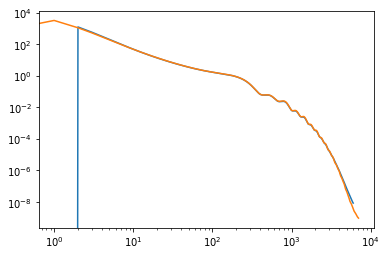

In [4]:
pl.loglog(ucls['tt'])
pl.loglog(cls_unl['tt'])

In [6]:
lmax_CMB = 3000

In [20]:
opath = '/global/homes/o/omard/so-lenspipe/data/5_'
e1, e2 = 'TT', 'TT'
Nlg_bh_ = np.loadtxt(f'{opath}Nlg_{e1}_{e2}.txt')

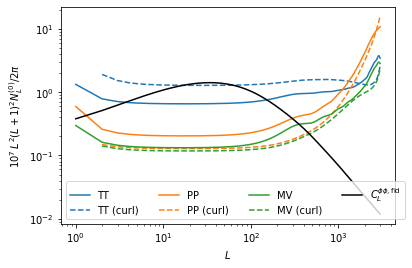

In [17]:
N0s, N0_curls = n0s.get_N0(cls_dat = None, lmin_CMB = 100, lmax_CMB = lmax_CMB, joint_TP = False, 
                            cls_len = tcls, cls_weight = lcls) # Check this out for options

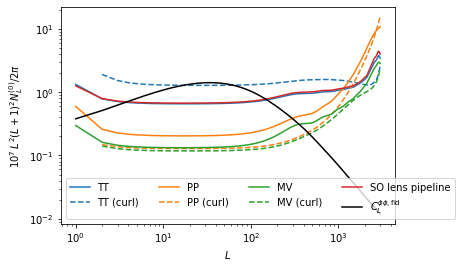

In [29]:

for qe_key in N0s.keys():
    label = {'tt':'TT', '_p':'PP', '':'MV'}[qe_key[1:]]
    ln = pl.loglog(ls, wls(ls) * N0s[qe_key][ls], label=label)
    pl.loglog(ls_curl, wls(ls_curl) * N0_curls[qe_key][ls_curl], label=label + ' (curl)', ls='--', c=ln[0].get_color())

pl.plot(ls, Nlg_bh_[ls]*1e7/(2*np.pi)*4, label = 'SO lens pipeline')

pl.plot(ls, wls(ls) * cls_unl['pp'][ls], c='k', label=r'$C_L^{\phi\phi, \rm fid}$')
pl.xlabel(r'$L$')
pl.ylabel(r'$10^7 \: L^2(L + 1)^2 N_L^{(0)} / 2 \pi$')
pl.legend(ncol=4)
pl.show()


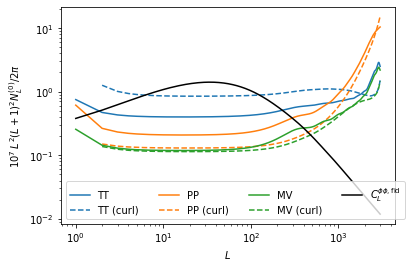

In [16]:
N0s, N0_curls = n0s.get_N0(cls_dat = None, lmin_CMB = 100, lmax_CMB = lmax_CMB, joint_TP = False) # Check this out for options
for qe_key in N0s.keys():
    label = {'tt':'TT', '_p':'PP', '':'MV'}[qe_key[1:]]
    ln = pl.loglog(ls, wls(ls) * N0s[qe_key][ls], label=label)
    pl.loglog(ls_curl, wls(ls_curl) * N0_curls[qe_key][ls_curl], label=label + ' (curl)', ls='--', c=ln[0].get_color())
pl.plot(ls, wls(ls) * cls_unl['pp'][ls], c='k', label=r'$C_L^{\phi\phi, \rm fid}$')
pl.xlabel(r'$L$')
pl.ylabel(r'$10^7 \: L^2(L + 1)^2 N_L^{(0)} / 2 \pi$')
pl.legend(ncol=4)
pl.show()
